<a href="https://colab.research.google.com/github/colin-hehir/Forecasting-of-CO2-Emissions/blob/main/Multidimensional_Time_Series_Motifs_CO2_Emissions_by_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STUMPY Matrix Profile code available at: https://towardsdatascience.com/the-matrix-profile-e4a679269692 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 6]  # width, height
plt.rcParams['xtick.direction'] = 'out'

#https://towardsdatascience.com/part-10-discovering-multidimensional-time-series-motifs-45da53b594bb

In [ ]:
!pip install scipy>=1.5
!pip install stumpy

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':'1zQIrENrdJYc55MXfCA_8ci5XSYxvgsoe'}) 
downloaded.GetContentFile('World_Data_CO2_Industry.csv')  
World_Data_CO2_Industry = pd.read_csv('World_Data_CO2_Industry.csv')
print(World_Data_CO2_Industry.describe())

              year      coal_co2   cement_co2  flaring_co2      gas_co2  \
count   271.000000    271.000000   141.000000    71.000000   139.000000   
mean   1885.000000   2909.085022   306.121950   250.602127  1764.258144   
std      78.375166   3878.904130   438.462979   112.083903  2269.775133   
min    1750.000000      9.351000     0.000000    73.624000     0.165000   
25%    1817.500000     49.537500     0.148000   157.467500    35.755500   
50%    1885.000000    986.989000    66.855000   242.863000   416.148000   
75%    1952.500000   4041.174000   416.418000   357.207000  3053.972500   
max    2020.000000  15062.902000  1626.371000   435.034000  7553.394000   

            oil_co2  other_industry_co2  
count    166.000000           31.000000  
mean    3570.007000          249.225355  
std     4385.690198           35.087191  
min        0.037000          211.381000  
25%       53.320500          218.318500  
50%      809.501000          241.025000  
75%     8338.068750          2

In [ ]:
World_Data_CO2_IndustryT = World_Data_CO2_Industry.drop(World_Data_CO2_Industry.columns[[0, 1]], axis = 1)

In [ ]:
print(World_Data_CO2_IndustryT.describe())

           coal_co2   cement_co2  flaring_co2      gas_co2       oil_co2  \
count    271.000000   141.000000    71.000000   139.000000    166.000000   
mean    2909.085022   306.121950   250.602127  1764.258144   3570.007000   
std     3878.904130   438.462979   112.083903  2269.775133   4385.690198   
min        9.351000     0.000000    73.624000     0.165000      0.037000   
25%       49.537500     0.148000   157.467500    35.755500     53.320500   
50%      986.989000    66.855000   242.863000   416.148000    809.501000   
75%     4041.174000   416.418000   357.207000  3053.972500   8338.068750   
max    15062.902000  1626.371000   435.034000  7553.394000  12229.642000   

       other_industry_co2  
count           31.000000  
mean           249.225355  
std             35.087191  
min            211.381000  
25%            218.318500  
50%            241.025000  
75%            284.334500  
max            303.858000  


In [ ]:
World_Data_CO2_IndustryT

,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2
0,9.351,NaN,NaN,NaN,NaN,NaN
1,9.351,NaN,NaN,NaN,NaN,NaN
2,9.354,NaN,NaN,NaN,NaN,NaN
3,9.354,NaN,NaN,NaN,NaN,NaN
4,9.358,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
266,14360.628,1478.758,387.691,6967.333,11959.219,298.830
267,14453.702,1500.493,422.856,7117.014,12130.801,300.871
268,14718.145,1566.740,412.217,7457.572,12190.055,301.411
269,14573.219,1608.472,434.596,7553.394,12229.642,303.181


In [ ]:
World_Data_CO2_Industry_Ti = World_Data_CO2_IndustryT.rename(columns={'coal_co2': 'T1', 'cement_co2': 'T2','flaring_co2': 'T3','gas_co2': 'T4','oil_co2': 'T5','other_industry_co2': 'T6'})

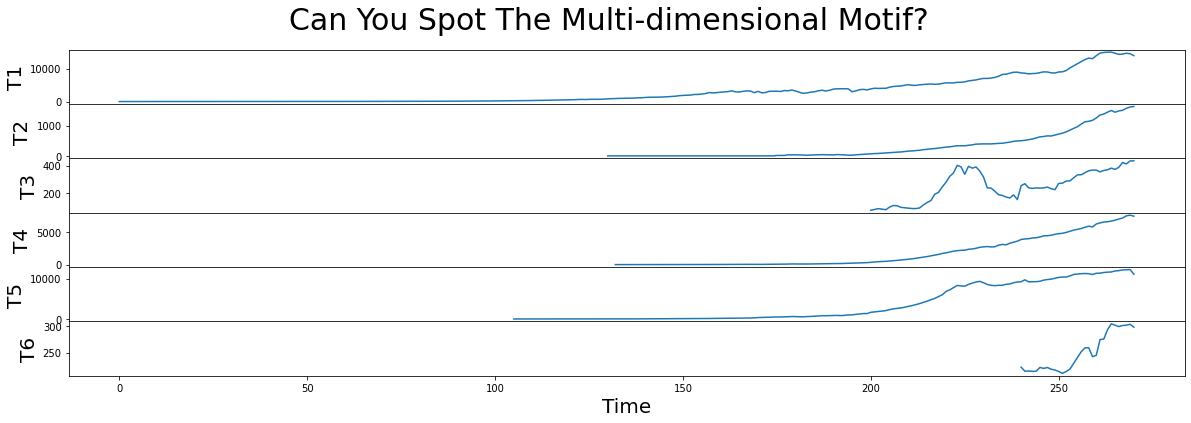

In [ ]:
fig, axs = plt.subplots(World_Data_CO2_Industry_Ti.shape[1], sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Can You Spot The Multi-dimensional Motif?', fontsize='30')
for i in range(World_Data_CO2_Industry_Ti.shape[1]):
    axs[i].set_ylabel(f'T{i + 1}', fontsize='20')
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].plot(World_Data_CO2_Industry_Ti[f'T{i + 1}'])
plt.show()

In [ ]:
m= 10
mps, indices = stumpy.mstump(World_Data_CO2_Industry_Ti, m)

In [ ]:
motifs_idx = np.argsort(mps, axis=1)[:, :2]

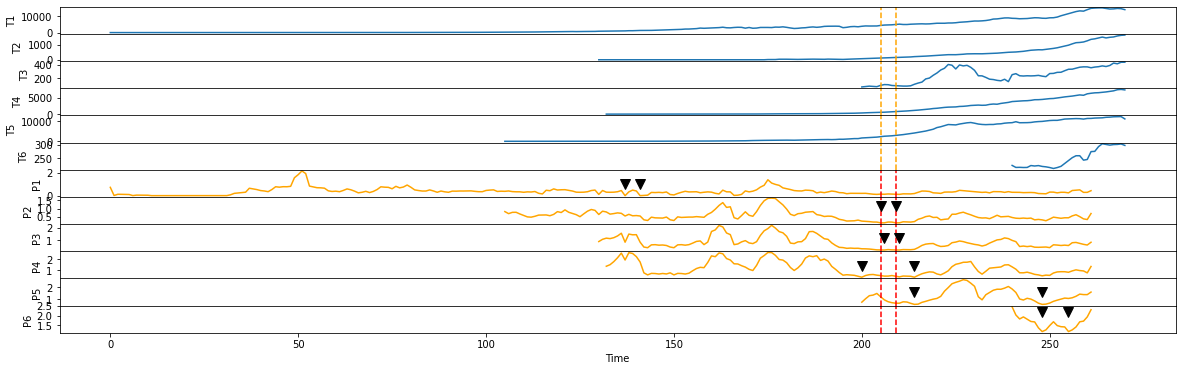

In [ ]:
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0})
for k, dim_name in enumerate(World_Data_CO2_Industry_Ti.columns):
    axs[k].set_ylabel(dim_name, fontsize='10')
    axs[k].plot(World_Data_CO2_Industry_Ti[dim_name])
    axs[k].set_xlabel('Time', fontsize ='10')
    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='10')
    axs[k + mps.shape[0]].plot(mps[k], c='orange')
    axs[k + mps.shape[0]].set_xlabel('Time', fontsize ='10')
    axs[k].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='orange')
    axs[k].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='orange')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='red')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='red')
    axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='black')
    axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='black')
plt.show()

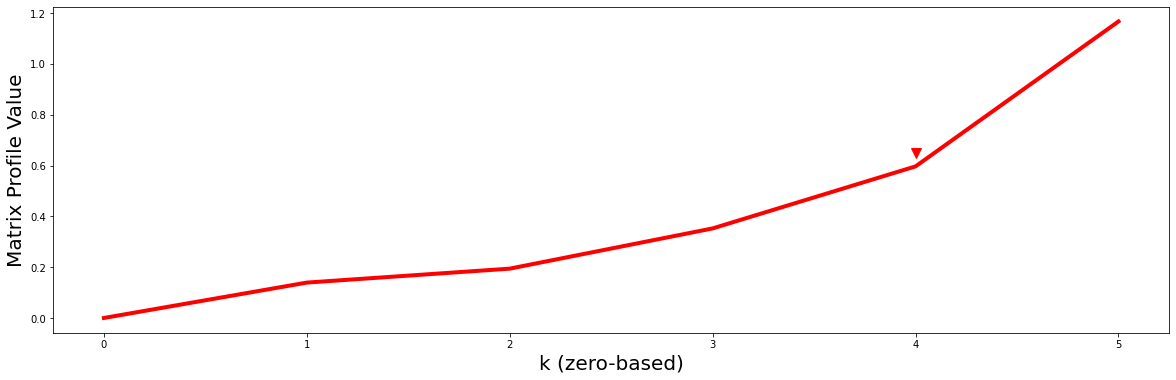

In [ ]:
mps, indices = stumpy.mstump(World_Data_CO2_Industry_Ti, m)
motifs_idx = np.argsort(mps, axis=1)[:, :2]
plt.plot(mps[range(mps.shape[0]), motifs_idx[:, 0]], c='red', linewidth='4')
plt.xlabel('k (zero-based)', fontsize='20')
plt.ylabel('Matrix Profile Value', fontsize='20')
plt.xticks(range(mps.shape[0]))
plt.plot(4, 0.65, marker="v", markersize=10, color='red')
plt.show()

In [ ]:
k = 4
S = stumpy.subspace(World_Data_CO2_Industry_Ti, m, motifs_idx[k][0], indices[k][motifs_idx[k][0]], k)
print(f"For k = {k}, the {k + 1}-dimensional subspace includes subsequences from {World_Data_CO2_Industry_Ti.columns[S].values}")

For k = 4, the 5-dimensional subspace includes subsequences from ['T4' 'T2' 'T5' 'T3' 'T1']
